In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan #for Breusch-Pagan test test
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from scipy import stats
from statsmodels.stats.diagnostic import linear_rainbow #linearity test
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity

In [34]:
data = pd.read_excel("Student_data.xlsx")


In [4]:
data.isnull().values.any()


False

In [8]:
data.isnull().sum()


StudentID      0
school2        0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
Final_Grade    0
dtype: int64

In [11]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school2        395 non-null object
sex            395 non-null object
age            395 non-null int64
address        395 non-null object
famsize        395 non-null object
Pstatus        395 non-null object
Medu           395 non-null int64
Fedu           395 non-null int64
Mjob           395 non-null object
Fjob           395 non-null object
reason         395 non-null object
guardian       395 non-null object
traveltime     395 non-null int64
studytime      395 non-null int64
failures       395 non-null int64
schoolsup      395 non-null object
famsup         395 non-null object
paid           395 non-null object
activities     395 non-null object
nursery        395 non-null object
higher         395 non-null object
internet       395 non-null object
romantic       395 non-null object
famrel         395 non-null int64
freetime       395 non-null int64
goout          395 non-null 

In [10]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [9]:
data.drop("StudentID",
          axis=1,
          inplace=True)

In [12]:
data_numeric = data.select_dtypes(exclude=["object"])
data_object = data.select_dtypes(include=["object"])

In [13]:
for i in data_object.columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

school2 
 GP    349
MS     46
Name: school2, dtype: int64 
 

--------------------
sex 
 F    208
M    187
Name: sex, dtype: int64 
 

--------------------
address 
 U    307
R     88
Name: address, dtype: int64 
 

--------------------
famsize 
 GT3    281
LE3    114
Name: famsize, dtype: int64 
 

--------------------
Pstatus 
 T    354
A     41
Name: Pstatus, dtype: int64 
 

--------------------
Mjob 
 other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64 
 

--------------------
Fjob 
 other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64 
 

--------------------
reason 
 course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64 
 

--------------------
guardian 
 mother    273
father     90
other      32
Name: guardian, dtype: int64 
 

--------------------
schoolsup 
 no     344
yes     51
Name: schoolsup, dtype: int64 
 

---------------

In [14]:
data_numeric.var()==0

age            False
Medu           False
Fedu           False
traveltime     False
studytime      False
failures       False
famrel         False
freetime       False
goout          False
Dalc           False
Walc           False
health         False
absences       False
Final_Grade    False
dtype: bool

In [16]:
data_numeric.corr().round(2)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
age,1.00,-0.16,-0.16,0.07,-0.00,0.24,0.05,0.02,0.13,0.13,0.12,-0.06,0.18,-0.16
Medu,-0.16,1.00,0.62,-0.17,0.06,-0.24,-0.00,0.03,0.06,0.02,-0.05,-0.05,0.10,0.22
Fedu,-0.16,0.62,1.00,-0.16,-0.01,-0.25,-0.00,-0.01,0.04,0.00,-0.01,0.01,0.02,0.15
traveltime,0.07,-0.17,-0.16,1.00,-0.10,0.09,-0.02,-0.02,0.03,0.14,0.13,0.01,-0.01,-0.12
studytime,-0.00,0.06,-0.01,-0.10,1.00,-0.17,0.04,-0.14,-0.06,-0.20,-0.25,-0.08,-0.06,0.10
failures,0.24,-0.24,-0.25,0.09,-0.17,1.00,-0.04,0.09,0.12,0.14,0.14,0.07,0.06,-0.36
famrel,0.05,-0.00,-0.00,-0.02,0.04,-0.04,1.00,0.15,0.06,-0.08,-0.11,0.09,-0.04,0.05
freetime,0.02,0.03,-0.01,-0.02,-0.14,0.09,0.15,1.00,0.29,0.21,0.15,0.08,-0.06,0.01
goout,0.13,0.06,0.04,0.03,-0.06,0.12,0.06,0.29,1.00,0.27,0.42,-0.01,0.04,-0.13
Dalc,0.13,0.02,0.00,0.14,-0.20,0.14,-0.08,0.21,0.27,1.00,0.65,0.08,0.11,-0.05


In [17]:
data_new=data_numeric.join(data_object,how='outer')


In [25]:
var=data_new.columns.tolist()
var

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'Final_Grade',
 'school2',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [31]:
data_new.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,18,4,4,2,2,0,4,3,4,1,...,course,mother,yes,no,no,no,yes,yes,no,no
1,17,1,1,1,2,0,5,3,3,1,...,course,father,no,yes,no,no,no,yes,yes,no
2,15,1,1,1,2,3,4,3,2,2,...,other,mother,yes,no,yes,no,yes,yes,yes,no
3,15,4,2,1,3,0,3,2,2,1,...,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,16,3,3,1,2,0,4,3,2,1,...,home,father,no,yes,yes,no,yes,yes,no,no


In [26]:
formula="+".join(var)
formula='Final_Grade~'+formula
formula

'Final_Grade~age+Medu+Fedu+traveltime+studytime+failures+famrel+freetime+goout+Dalc+Walc+health+absences+Final_Grade+school2+sex+address+famsize+Pstatus+Mjob+Fjob+reason+guardian+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic'

In [27]:
model=ols(formula=formula, data=data_new)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.909e+29
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:22:33   Log-Likelihood:                 11911.
No. Observations:                 395   AIC:                        -2.374e+04
Df Residuals:                     354   BIC:                        -2.358e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.553e-15   2.27e-14      0.157      0.876   -4.11e-14    4.82e-14
school2[T.MS]        -6.578e-15   3.96e-15     -1.662      0.097   -1.44e-14    1.21e-15
sex[T.M]             -3.719e-15   2.52e-15     -1.476      0.141   -8.68e-15    1.24e-15
address[T.U]          1.776e-15   2.92e-15      0.608      0.544   -3.97e-15    7.52e-15
famsize[T.LE3]       -3.192e-16   2.45e-15     -0.130      0.896   -5.13e-15    4.49e-15
Pstatus[T.T]         -4.441e-15   3.62e-15     -1.228      0.220   -1.16e-14    2.67e-15
Mjob[T.health]       -3.997e-15   5.59e-15     -0.715      0.475    -1.5e-14       7e-15
Mjob[T.other]        -3.775e-15   3.56e-15     -1.059      0.290   -1.08e-14    3.23e-15
Mjob[T.services]     -6.217e-15   3.99e-15     -1.558      0.120   -1.41e-14    1.63e-15
Mjob[T.teacher]      -4.441e-15    5.2e-15     -0.855      0.393   -1.47e-14    5.78e-15
Fjob[T.health]       -2.665e-15   7.18e-15     -0.371      0.711   -1.68e-14    1.15e-14
Fjob[T.other]        -1.332e-15   5.11e-15     -0.261      0.795   -1.14e-14    8.72e-15
Fjob[T.services]       2.22e-16   5.28e-15      0.042      0.966   -1.02e-14    1.06e-14
Fjob[T.teacher]       4.219e-15   6.49e-15      0.650      0.516   -8.54e-15     1.7e-14
reason[T.home]        4.441e-16   2.77e-15      0.161      0.873      -5e-15    5.89e-15
reason[T.other]      -1.998e-15   4.09e-15     -0.489      0.625      -1e-14    6.04e-15
reason[T.reputation]  4.441e-16   2.88e-15      0.154      0.878   -5.23e-15    6.12e-15
guardian[T.mother]   -1.887e-15   2.73e-15     -0.692      0.489   -7.25e-15    3.47e-15
guardian[T.other]    -5.107e-15      5e-15     -1.022      0.307   -1.49e-14    4.72e-15
schoolsup[T.yes]     -2.665e-15   3.35e-15     -0.795      0.427   -9.25e-15    3.93e-15
famsup[T.yes]          2.29e-16    2.4e-15      0.095      0.924    -4.5e-15    4.95e-15
paid[T.yes]           3.331e-16   2.39e-15      0.139      0.889   -4.36e-15    5.03e-15
activities[T.yes]     -1.79e-15   2.22e-15     -0.805      0.421   -6.16e-15    2.58e-15
nursery[T.yes]                0   2.74e-15          0      1.000    -5.4e-15     5.4e-15
higher[T.yes]         1.776e-15    5.4e-15      0.329      0.742   -8.84e-15    1.24e-14
internet[T.yes]      -4.441e-16    3.1e-15     -0.143      0.886   -6.54e-15    5.65e-15
romantic[T.yes]      -1.332e-15   2.36e-15     -0.564      0.573   -5.98e-15    3.31e-15
age                   2.554e-15   1.09e-15      2.343      0.020    4.11e-16     4.7e-15
Medu                  8.327e-16   1.62e-15      0.514      0.607   -2.35e-15    4.02e-15
Fedu                 -3.331e-16   1.39e-15     -0.240      0.810   -3.06e-15    2.39e-15
traveltime            8.882e-16   1.69e-15      0.524      0.600   -2.44e-15    4.22e-15
studytime            -4.718e-16   1.44e-15     -0.327    

In [28]:
model=ols(formula="Final_Grade~studytime+failures+absences+age+Medu", data=data)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     14.42
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           5.71e-13
Time:                        22:22:38   Log-Likelihood:                -1127.6
No. Observations:                 395   AIC:                             2267.
Df Residuals:                     389   BIC:                             2291.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.5594      3.060      4.431      0.000       7.543      19.576
studytime      0.2149      0.259      0.830      0.407      -0.294       0.724
failures      -1.9074      0.307     -6.215      0.000      -2.511      -1.304
absences       0.0329      0.027      1.199      0.231      -0.021       0.087
age           -0.2724      0.177     -1.542      0.124      -0.620       0.075
Medu           0.5153      0.204      2.526      0.012       0.114       0.916
==============================================================================
Omnibus:                       31.195   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.281
Skew:                          -0.710   Prob(JB):                     1.32e-08
Kurtosis:                       3.432   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

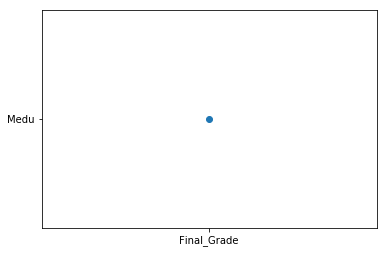

In [36]:
plt.scatter("Final_Grade", "Medu")
